K-Means is one of the most popular and intuitive clustering algorithms. Its primary goal is to partition a dataset into K distinct, non-overlapping clusters. The 'K' in K-Means refers to the number of clusters you specify beforehand. The algorithm iteratively assigns each data point to one of the K clusters based on its proximity to the cluster's center, and then recalculates the cluster centers based on the assigned data points. This process continues until the cluster assignments stabilize.

#### Key Components of K-Means:
**Data Points**: The individual observations or samples in your dataset.                                                                              
**Clusters**: Subsets of the data points that are grouped together because they are similar.                                                          
**Centroids**: The mean (average) of all data points within a cluster. Each cluster has one centroid, which acts as its representative center.         
**Distance Metric**: A way to measure the similarity or dissimilarity between data points and between data points and centroids. The most common is the Euclidean distance.                                                                                                                               
**Number of Clusters (K)**: A hyperparameter that must be specified by the user before running the algorithm.

#### When is K-Means Suitable?
K-Means is particularly effective when:
The clusters are expected to be roughly spherical and of similar size.
The number of clusters (K) is known or can be reasonably estimated.
The dataset is large, as K-Means is computationally efficient.

### K-Means Steps

* **Step 1: Initialization**
  * Choose number of clusters **K**
  * Initialize **K centroids** (random / K-Means++)

* **Step 2: Assignment**
  * Compute distance (usually Euclidean)
  * Assign each point to nearest centroid

* **Step 3: Update**
  * Recalculate centroid as **mean of cluster points**

* **Step 4: Convergence**
  * Centroids stop changing **or**
  * Assignments remain same **or**
  * Max iterations reached

* **Step 5: Iteration**
  * Repeat Assignment & Update until convergence

* **Goal**
  * Minimize **within-cluster variance (WCSS)**


## How to choose Initial Centroids

### K-Means Initialization Methods

**1. Random Initialization**
- Randomly select **K data points** as initial centroids  
- **Pros:** Simple, fast  
- **Cons:** High risk of poor initialization, local optima, results vary between runs  

**2. Random Partition Initialization**
- Randomly assign each data point to one of **K clusters**
- Compute centroids as **mean of assigned points**
- **Pros:** More structured than pure random selection  
- **Cons:** Still prone to poor initialization  

**3. K-Means++ Initialization**
- Choose first centroid randomly
- Compute distance **D(x)** from each point to nearest centroid
- Select next centroid with probability ∝ **D(x)²**
- Repeat until **K centroids** are chosen
- **Pros:** Better clustering quality, faster convergence, less randomness  
- **Cons:** Slightly higher computational cost


### K-Means Convergence Criteria

- **Centroid Stability**
  - Centroids move very little or stop changing between iterations

- **Assignment Stability**
  - No data points change their cluster assignment

- **Maximum Iterations**
  - Algorithm stops after a predefined iteration limit (safety stop)

- **Note**
  - Convergence criteria affect speed and results  
  - Default settings in libraries (e.g., Scikit-learn) are usually sufficient

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
sns.set_style('whitegrid')

In [3]:
np.random.seed(42) # for reproducibility

X_cluster1 = np.random.randn(100, 2) + np.array([5, 5])
X_cluster2 = np.random.randn(100, 2) + np.array([-5, -5])

X = np.vstack((X_cluster1, X_cluster2))

# Convert to Pandas DataFrame for easier handling and visualization
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

print(f"Shape of the dataset: {df.shape}")
print("First 5 rows:")
print(df.head())

Shape of the dataset: (200, 2)
First 5 rows:
   Feature1  Feature2
0  5.496714  4.861736
1  5.647689  6.523030
2  4.765847  4.765863
3  6.579213  5.767435
4  4.530526  5.542560


In [5]:
# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(X_scaled,columns=['Feature1_scaled','Feature2_scaled'])
print(df_scaled.head())

   Feature1_scaled  Feature2_scaled
0         1.104863         0.948071
1         1.135245         1.274638
2         0.957786         0.929225
3         1.322701         1.126107
4         0.910431         1.081903


In [12]:
# instantiating k means
k_means=KMeans(n_clusters=2, random_state=42,n_init='auto')

k_means.fit(X_scaled) # training

# Prediction
cluster_labels = k_means.predict(X_scaled)
df['Cluster'] = cluster_labels
print(df.head())

   Feature1  Feature2  Cluster
0  5.496714  4.861736        0
1  5.647689  6.523030        0
2  4.765847  4.765863        0
3  6.579213  5.767435        0
4  4.530526  5.542560        0


C:\Users\ASUS\anaconda3\envs\ml_ds_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


##### What does 'Fitting'(.fit()) mean in K-Means?
Fitting the K-Means model involves the algorithm executing its iterative process:                                                                    
**Initialization**: Randomly selecting initial centroids (or using K-Means++ for better initialization).                                             
**Assignment**: Assigning each data point to the nearest centroid.                                                                                    
**Update**: Recalculating the centroids based on the mean of the assigned points.                                                                     
**Convergence**: Repeating steps 2 and 3 until the centroids stabilize or a maximum number of iterations is reached.                              

##### What is the predict() Method?
The predict() method takes new data points (or the same data used for fitting) as input and, for each data point, calculates its distance to all the learned cluster centroids. It then assigns the data point to the cluster whose centroid is closest. The output is an array of cluster labels, where each label corresponds to a data point in the input array.

In [14]:
# Access cluster centers
centers = k_means.cluster_centers_
print(centers)

[[ 0.98165025  0.98193794]
 [-0.98165025 -0.98193794]]


The **cluster_centers_** attribute returns the coordinates of the centroids in the scaled feature space if you fitted the model on scaled data. To interpret these centers in the context of your original data's units, you often need to inverse transform them.

### Importance of Choosing K in K-Means
 **Small K (Too Few Clusters)**
  - Causes over-generalization
  - Distinct groups may merge into one cluster
  - Important patterns can be missed

 **Large K (Too Many Clusters)**
  - Causes overfitting
  - Clusters may capture noise
  - Results in very small or less meaningful clusters


<Axes: xlabel='Feature1', ylabel='Feature2'>

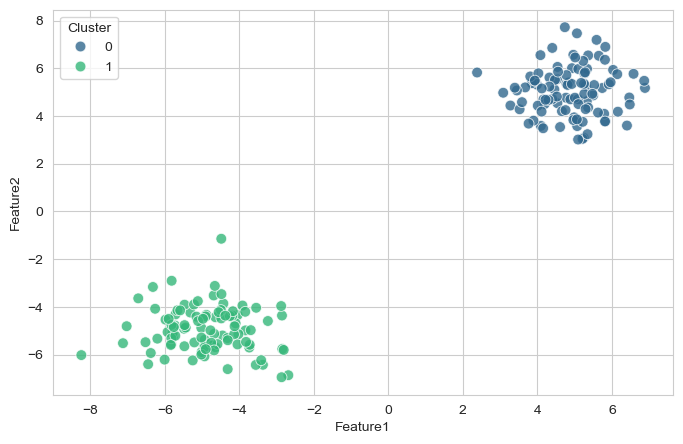

In [15]:
# Visualizing the Clustered Data Points
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df, 
    x='Feature1', 
    y='Feature2', 
    hue='Cluster', # Color points by cluster
    palette='viridis', # Choose a color palette
    s=60, # Size of the points
    alpha=0.8 # Transparency
)

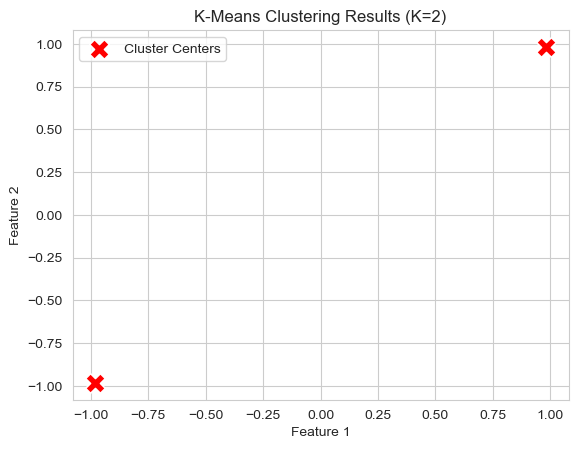

In [17]:
# Plotting centers on the scaled data space (easier)
sns.scatterplot(
    x=centers[:, 0], 
    y=centers[:, 1], 
    marker='X',
    s=200, # Larger marker for centers
    color='red', # Distinct color for centers
    label='Cluster Centers'
)

plt.title(f'K-Means Clustering Results (K={2})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Inverse transform the cluster centers to get them back to the original scale
centers_original_scale = scaler.inverse_transform(centers)
centers_df_original = pd.DataFrame(centers_original_scale, columns=['Feature1', 'Feature2'])
print(centers_df_original)

   Feature1  Feature2
0  4.884436  5.034022
1 -4.871751 -4.956512


### Methods to find value of 'K' in K-means

### 1. The Elbow Method: Finding the 'Sweet Spot' for 'k'

Elbow Method relies on plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters ('k'). WCSS, also known as inertia, is a measure of the compactness of the clusters. It is calculated as the sum of the squared distances between each data point and its assigned cluster centroid.

#### Elbow Method Implementation (K-Means)

- Define a range of **k values** (e.g., ou would start from 1 and go up to a reasonable maximum, such as 10 or 15, depending on the expected complexity of your data.)
- Create an empty list to store **WCSS (inertia)**
- For each **k**:
  - Initialize K-Means (set `random_state`)
  - Fit the model on data
  - Store `inertia_` value
- Plot **WCSS vs k** using Matplotlib
- Identify the **elbow point** where the curve bends sharply
- Elbow point ⇒ **Optimal number of clusters (k)**


In [22]:
from sklearn.datasets import make_blobs

In [26]:
np.random.seed(42) 
X,y=make_blobs(n_samples=300,centers=3,cluster_std=0.8,random_state=42)  # make_blobs is used to generate synthetic (fake) clustered data
# n_samples: total number of data points
# centers: number of clusters to generate
# cluster_std: standard deviation of the clusters (controls spread)
# random_state: for reproducible results

df = pd.DataFrame(X, columns=['Feature1','Feature2'])
print(df.shape)
print(df.head())

(300, 2)
   Feature1  Feature2
0 -7.247116 -7.559985
1 -7.567958 -7.187754
2 -1.851162  8.037611
3  4.465734  2.852191
4 -8.510127 -7.686579


In [29]:
# Calculate WCSS for a Range of 'k' Values
wcss = []
# Define the range of k values to test (1 to 10)
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Append the WCSS (inertia) to the list
    print(f"  - WCSS for k={k}: {kmeans.inertia_:.2f}")
print('WCSS calcualtion complete')

  - WCSS for k=1: 20120.54
  - WCSS for k=2: 5526.51
  - WCSS for k=3: 362.79
  - WCSS for k=4: 320.34
  - WCSS for k=5: 276.63
  - WCSS for k=6: 233.60
  - WCSS for k=7: 206.92
  - WCSS for k=8: 181.80
  - WCSS for k=9: 164.57
  - WCSS for k=10: 153.53
WCSS calcualtion complete


C:\Users\ASUS\anaconda3\envs\ml_ds_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\ml_ds_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\ml_ds_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\ml_ds_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

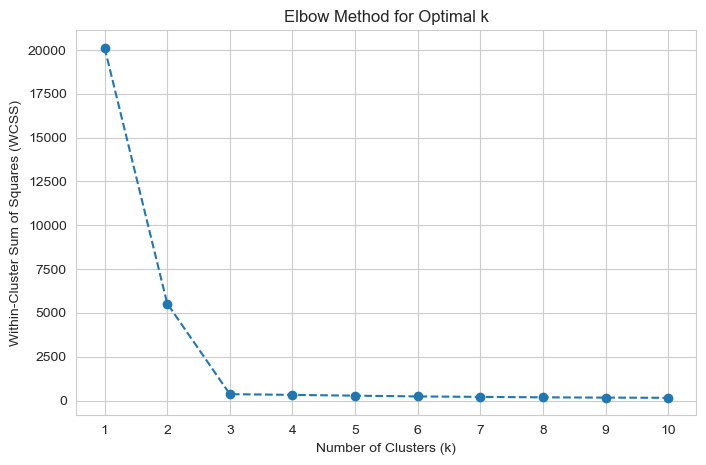

In [32]:
# Visualisation of elbow plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

##### Interpreting the Elbow Plot
Observe the generated plot. You are looking for the point where the rate of decrease in WCSS slows down significantly, forming an 'elbow' shape. In our synthetic dataset, which was generated with 3 centers, you should expect to see a clear bend around **k=3**. The WCSS will decrease as 'k' increases, but the drop will be much less pronounced after the elbow point.

### 2. Silhouette Score: A Quantitative Measure of Cluster Cohesion and Separation

While the Elbow Method provides a visual heuristic, the Silhouette Score offers a more quantitative approach to evaluating the quality of clusters. It measures how similar a data point is to its own cluster (cohesion) compared to other clusters (separation).

##### Using the Silhouette Score allows us to:
 - **Compare different clustering algorithms**: Evaluate which algorithm performs best on a given dataset.                                             
 - **Compare different parameter settings**: Determine the optimal 'k' for K-Means or other clustering algorithms by finding the 'k' that yields the highest average Silhouette Score.                                                                                                                      
 - **Identify poorly formed clusters**: Data points with very low or negative silhouette coefficients can indicate potential issues with the clustering, such as points that are outliers or clusters that are too close together.      

#### Silhouette Method – Step-by-Step Implementation

- Import `silhouette_score` and `silhouette_samples` from `sklearn.metrics`
- Run K-Means clustering for a range of **k values**
- For each **k**:
  - Fit K-Means and get cluster labels
  - Compute **average silhouette score** using `silhouette_score`
- Store silhouette scores for all **k**
- Choose **k with highest silhouette score** as optimal
- (Optional) Use `silhouette_samples` to visualize individual scores


In [36]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [40]:
# Calculating 'silhouette_score' for range of k
silhouette_scores = []
for k in k_range[1:]:   # Silhouette score is not defined for k=1, so we start from k=2
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_label = kmeans.fit_predict(X)   # fit and predict using one function only
    
    # silhouette_score requires at least 2 clusters
    if k > 1:
        score = silhouette_score(X, cluster_label)
        silhouette_scores.append(score)
        print(f"  - Silhouette Score for k={k}: {score:.3f}")
    else:
        # Handle k=1 case if needed, though silhouette_score requires k>=2
        pass

print("Silhouette Score calculation complete.")

  - Silhouette Score for k=2: 0.721
  - Silhouette Score for k=3: 0.878
  - Silhouette Score for k=4: 0.693
  - Silhouette Score for k=5: 0.498
  - Silhouette Score for k=6: 0.327
  - Silhouette Score for k=7: 0.333
  - Silhouette Score for k=8: 0.340
  - Silhouette Score for k=9: 0.327
  - Silhouette Score for k=10: 0.327
Silhouette Score calculation complete.


C:\Users\ASUS\anaconda3\envs\ml_ds_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\ml_ds_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\ml_ds_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\ml_ds_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

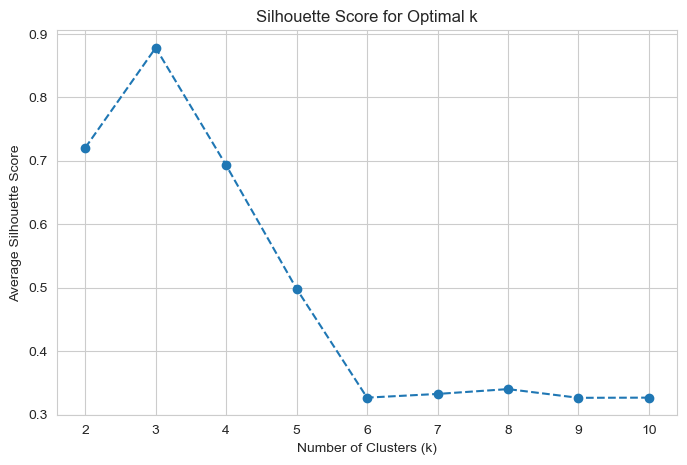

In [42]:
#  Visualize the Silhouette Scores
plt.figure(figsize=(8,5))
# We start k_range from 2 because silhouette_score requires at least 2 clusters
plt.plot(k_range[1:], silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_range[1:])
plt.grid(True)
plt.show()

##### Interpreting the Silhouette Scores Plot
The goal is to find the 'k' that yields the highest average Silhouette Score. In the plot, look for the peak. For our synthetic data, we expect the highest score to be around **k=3**, indicating that three clusters provide the best balance of cohesion and separation.

### Limitations of K-Means Clustering

- Must specify **K** in advance
- Sensitive to **initial centroid selection**
- Assumes **spherical, equally sized clusters**
- Performs poorly with **non-linear or overlapping clusters**
- Sensitive to **outliers and noise**
- Works best with **numeric data only**
- Distance-based → affected by **feature scaling**
